In [1]:
!nvidia-smi

Mon Sep 21 04:16:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(x_train, y_train), (x_test, y_test) = load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


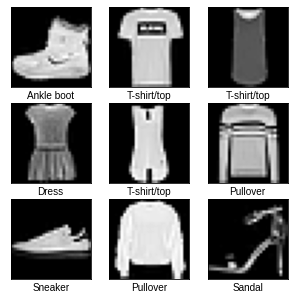

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

fig = plt.figure(figsize=(5,5))

for i, idx in enumerate(random_idx):
    plt.subplot(3,3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.style.use("seaborn")
plt.show()

In [16]:
# valid dataset + normalization
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

x_train = (x_train.reshape(-1, 28*28))/255
x_val = (x_val.reshape(-1, 28*28))/255
x_test = (x_test.reshape(-1, 28*28))/255

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

**1. model 구성**

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

first_model = Sequential()
first_model.add(Flatten(input_shape=(28,28))) # (28,28) -> (28*28, )
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax'))

**2. 학습과정 설정 (compile)**

In [14]:
first_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

**3. training(fit + history 객체(loss, acc 저장))**

In [17]:
first_history = first_model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.6798 - acc: 0.7746 - val_loss: 0.4574 - val_acc: 0.8443
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4377 - acc: 0.8455 - val_loss: 0.4481 - val_acc: 0.8396
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3978 - acc: 0.8575 - val_loss: 0.3784 - val_acc: 0.8662
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3681 - acc: 0.8671 - val_loss: 0.3796 - val_acc: 0.8619
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3470 - acc: 0.8740 - val_loss: 0.3572 - val_acc: 0.8749
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3318 - acc: 0.8800 - val_loss: 0.3508 - val_acc: 0.8771
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3161 - acc: 0.8847 - val_loss: 0.3428 - val_acc: 0.8769
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

In [18]:
sec_model = Sequential()
sec_model.add(Flatten(input_shape=(28,28))) # (28,28) -> (28*28, )
sec_model.add(Dense(128, activation='relu'))
sec_model.add(Dense(128, activation='relu'))
sec_model.add(Dense(32, activation='relu'))
sec_model.add(Dense(10, activation='softmax'))

sec_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

sec_history = sec_model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 1s 4ms/step - loss: 0.6333 - acc: 0.7806 - val_loss: 0.4365 - val_acc: 0.8484
Epoch 2/30
329/329 [==============================] - 1s 3ms/step - loss: 0.4185 - acc: 0.8506 - val_loss: 0.3920 - val_acc: 0.8633
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3660 - acc: 0.8672 - val_loss: 0.3990 - val_acc: 0.8521
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3447 - acc: 0.8737 - val_loss: 0.3665 - val_acc: 0.8674
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3186 - acc: 0.8831 - val_loss: 0.3359 - val_acc: 0.8816
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.3000 - acc: 0.8890 - val_loss: 0.3459 - val_acc: 0.8748
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.2867 - acc: 0.8926 - val_loss: 0.3186 - val_acc: 0.8858
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

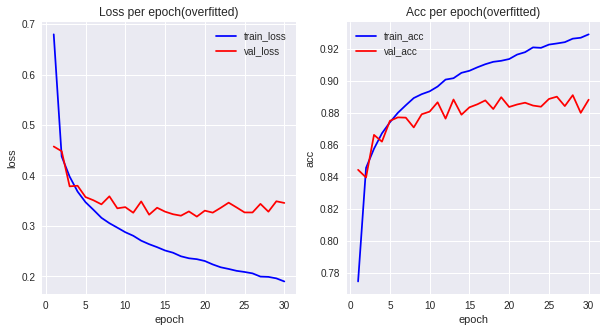

In [19]:
hist_dict = first_history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(overfitted)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(overfitted)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()

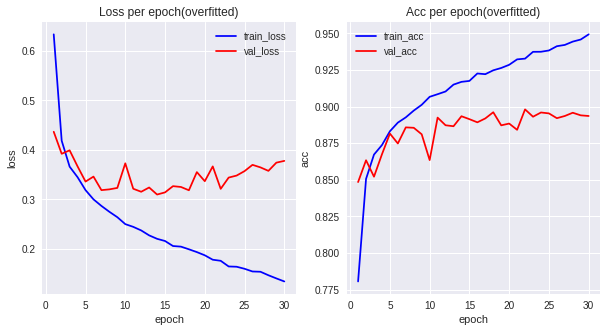

In [20]:
hist_dict = sec_history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']

acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(10,5))

# loss 그리기
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
ax1.set_title("Loss per epoch(overfitted)")
ax1.set_xlabel("epoch")
ax1.set_ylabel("loss")
ax1.legend()

# acc 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'red', label = 'val_acc')
ax2.set_title("Acc per epoch(overfitted)")
ax2.set_xlabel("epoch")
ax2.set_ylabel("acc")
ax2.legend()

plt.style.use("seaborn")
plt.show()